In [1]:
from ddpg import ReplayBuffer, DDPGAgent, EpsilonGreedy
from fsae.envs import *
import time

pybullet build time: Apr 10 2024 13:56:47


In [2]:
env = RandomTrackEnv(render_mode=None, seed=0)

argv[0]=
argv[0]=


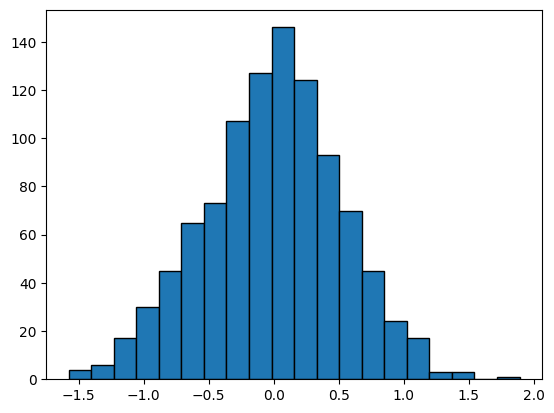

In [3]:
samples = np.random.normal(0,0.5, 1000)
plt.hist(samples, bins=20, edgecolor='black')
plt.show()


In [4]:
# Initialize the agent, replay buffer, and environment
state_dim = 8 # Dimension of the state space
action_dim = 2 # Dimension of the action space
hidden_dim = 256
max_action = (1,0.6) # Maximum value of the action
num_episodes = 1000
max_steps = 500
batch_size = 256

replay_buffer = ReplayBuffer(buffer_size=50000, state_dim=state_dim, action_dim=action_dim)
# replay_buffer.load_from_csv("replay_buffers/replayBuffer_teleop_test.csv")
agent = DDPGAgent(state_dim, action_dim, hidden_dim, replay_buffer, max_action)
greedy = EpsilonGreedy(1, 0.01, 0.001, num_episodes, 0.4)
if replay_buffer.size > batch_size:
    print("Replay buffer size after load: ", replay_buffer.size, " vs Batch Size: ", batch_size)
    agent.train(batch_size)

rewards = []
avg_rewards = []
best_reward  = 0

# Training loop
for episode in range(num_episodes):
    state = env.reset(seed=episode)
    episode_reward = 0

    for step in range(max_steps):
        action = greedy.get_action(agent, state)
        # print(action)
        next_state, reward, done, _ = env.step(action)
        if done: 
            reward -= 0.5
        
        replay_buffer.add(state, action, reward, next_state, done)
        state = next_state
        episode_reward += reward

        if replay_buffer.size > batch_size:
            agent.train(batch_size)
            # print("Training")

        if done:
            break
    
    rewards.append(episode_reward)

    if (episode % 10 == 0):
        avg_reward = np.mean(np.asarray(rewards))
        print(f"{episode} Average Episode Reward: {avg_reward}")
        rewards.clear()
        avg_rewards.append(avg_reward)
        if avg_reward > best_reward:
            print("saved weights")
            agent.save_weights()
            best_reward = avg_reward

    greedy.incr_step()

agent.save_weights(best=False)


[ 1.         -0.27909435]
[1.         0.73180402]
[ 1.         -0.07555096]
[1.         0.22761224]
[1.         0.41416975]
[ 1.        -0.4675839]
[ 1.         -0.33860175]
[ 1.         -0.25247351]
[ 1.         -0.16040431]
[ 1.         -0.21054093]
[ 1.         -0.08117527]
[1.         0.52663288]
[ 1.         -0.12306752]
0 Average Episode Reward: 3.200070037024237
saved weights
[1.         0.69994335]
[ 1.        -0.0707403]
[1.         0.32499222]
[1.         0.30855133]
[ 1.         -1.06825716]
[ 1.         -0.50738856]
[1.         0.12562288]
[1.         0.39681865]
[1.         1.28348018]
[1.         0.00500402]
[ 1.         -0.42252922]
[1.         0.12727939]
[1.         0.58130017]
[1.         0.84433373]
[ 1.         -0.63230082]
[1.         0.98039916]
[1.         0.20196333]
[ 1.         -0.60537363]
[1.         0.38887374]
[ 1.         -0.44527444]
[1.        0.4611592]
[1.         0.56409214]
[ 1.         -0.11199956]
[ 1.         -0.26883862]
[1.         0.07948385]


KeyboardInterrupt: 

In [ ]:
agent.save_weights(best=False)


In [ ]:
replay_buffer.save_as_csv("replayBuffer_train_test.csv")

In [ ]:
try:
    env.close()
except:
    pass    
env = RandomTrackEnv(render_mode='tp_camera', seed=0)



numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
argv[0]=
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=3
argv[0] = --unused
argv[1] = 
argv[2] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 3090/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 535.171.04
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 535.

In [ ]:
done = False
state = env.reset(seed=4)
agent.load_weights()

while not done:
    action = agent.get_action(state)
    next_state, reward, done, _ = env.step(action)
    state = next_state
    print(action)

[-0.23370957 -0.00461169]
[-0.23457627 -0.00424114]
[-0.23624828 -0.00349198]
[-0.23877387 -0.00239829]
[-0.24212442 -0.00096338]
[-0.24636342  0.00102903]
[-0.25154752  0.00333756]
[-0.25773022  0.0060369 ]
[-0.2651876   0.00929514]
[-0.27427402  0.01353724]
[-0.28541413  0.0179167 ]
[-0.29872474  0.02236607]
[-0.3147843   0.02649763]
[-0.33389688  0.03226393]
[-0.36037928  0.04221381]
[-0.39543736  0.05218395]
[-0.43433028  0.06113688]
[-0.47837186  0.06886237]
[-0.52499604  0.07387494]
[-0.5764085   0.08203612]
[-0.6219803   0.08329038]
[-0.6656955   0.09742311]
[-0.7103665   0.10829329]
[-0.7452019   0.12441184]
[-0.76444936  0.1259617 ]
[-0.8880484   0.20620854]
